# ECE 57000 Assignment 1 Exercises



Name: Sai V. Mudumba

## Exercise 1.1

In this exercise, you will need to write a simple function that reverses and doubles the values in a list. For example: input `[1,2,3]`, output `[6,4,2]`.

In [ ]:
def reverse_double(input:list)->list:

  # <MY CODE>
  input.reverse()
  input = [x*2 for x in input]
  return input

A = [1,2,3,4,5,6]
print(reverse_double(A))

[12, 10, 8, 6, 4, 2]


## Exercise 1.2
In this exercise, you will need to help visualize randomly generated spots scattered in normal distribution.

1.   Using numpy to generate a vector **D** with the following property:

  *   Each element is in a normal distribution. Hint: Try using the function [normal()](https://numpy.org/doc/1.18/reference/random/generated/numpy.random.normal.html)
  *   Vector has the shape **1000x1**

2.   Reshape the vector **D** into **500x2**

3.   Plot the graph in the following way:
  *   Treat the two columns of the array **D** as the **x** and **y** coordinates of spots. And use [scatter()](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.scatter.html) to visualize all the spots.
  *   Give the plot a title (any informational title), and also label x-axis and y-axis with approporite names
  *   Have the figure size 12 by 12
  *   Let the plot shows the range `[-5,5]x[-5,5]`





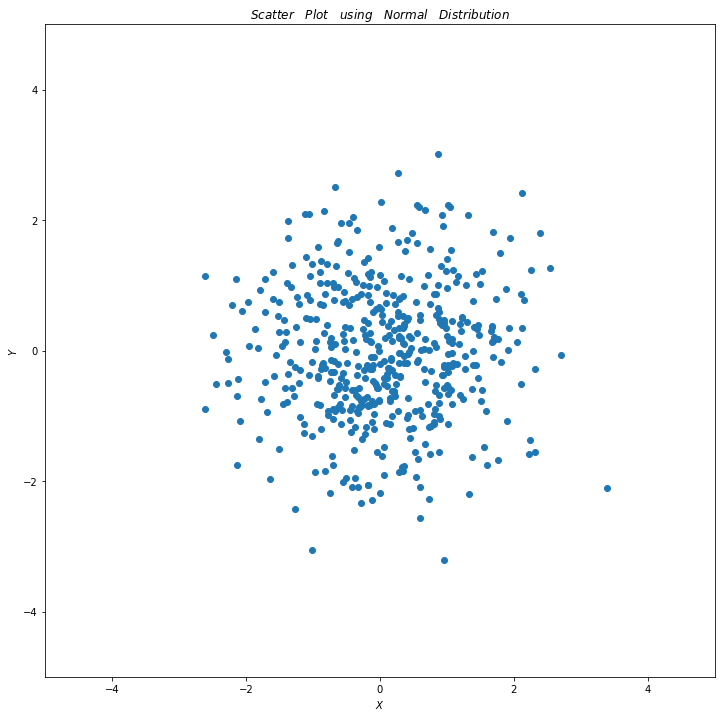

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#  <MY CODE>
D = np.random.normal(0,1,1000)
D = D.reshape(500,-1)

plt.figure(figsize=(12,12))
plt.scatter(D[:,0],D[:,1])
plt.title('$Scatter \quad Plot \quad using \quad Normal \quad Distribution$')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.show()

## Exercise 1.3

### Task 1: Generate a sparse matrix
1. Generate a matrix **X** with size 100x50 with each element randomly picked from a uniform distribution **U**[0,1].
2. Use logical(boolean) indexing to set the elements in **X** to **0** whenever the value of the element is smaller than 0.9 (In this way, you should get the matrix to have roughly 90% of its elements zero's).
3. Use the function [csr_matrix()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html#scipy.sparse.csr_matrix) to convert the matrix **X** into sparse matrix and call it **X_sparse**.



In [ ]:
import numpy as np
from scipy.sparse import csr_matrix

#  <MY CODE>
X = np.random.uniform(0, 1, 100*50) # create a vector of size 5000
X[X<0.90] = 0  # set everything that is less than 0.90 equal to 0.0
X = X.reshape(100,50) # reshape the vector into a matrix of size 100 x 50
X_sparse = csr_matrix(X)

print(f'X has type {type(X)} and has {100-np.sum(X!=0)/50}% of zeros')
print(f'X_sparse has type {type(X_sparse)} and has {100-np.sum(X_sparse!=0)/50}% of zeros')



X has type <class 'numpy.ndarray'> and has 89.76% of zeros
X_sparse has type <class 'scipy.sparse.csr.csr_matrix'> and has 89.76% of zeros





### Task 2: Construct the power iteration function
Following the algorithm in the instructions notebook, write a function that takes a sparse matrix **X** and number of iterations as input and the top right singular vector of the centered matrix as output. Write a function that is constructed in the following way:
```
def power_iter(X, num_iter:int):
  # your code
  return v_0
```

In [ ]:
def power_iter(X, num_iter:int):
    
  v = np.random.randn(X.shape[1]) # v has size = # of columns of X (i.e. 50)
  one_vec = np.ones_like(v) # vector of ones
  mu_col_matrix =np.mean(X, axis=1)  # Returns a 1 column matrix since X is of "matrix" type 
  mu = np.array(mu_col_matrix).squeeze()  # Convert from column matrix to 1D array

  #  <MY CODE>
  for i in np.arange(num_iter):    
    # Broke down the equation for v into segments for easier analysis
    a = X.dot(v)      
    b = (X.T).dot(a)
    
    c = X.dot(v)
    d = np.dot(mu.T, c)
    e = np.dot(one_vec,d)

    f = np.dot(one_vec.T,v)
    g = (X.T).dot(mu)
    h = np.dot(g,f)

    k = np.dot(mu.T,mu)
    l = np.dot(k, f)
    m = np.dot(one_vec,l)

    v = b - e - h + m
    v = v / np.linalg.norm(v, ord=2) 
  
    # One-line calculation of v 
    #v = X.T.dot(X.dot(v)) - np.dot(one_vec.T,mu.T.dot(X.dot(v))) - np.dot(X.T.#
    #dot(mu),one_vec.dot(v)) + np.dot(one_vec.T, np.dot(np.dot(mu.T,mu),one_vec.
    #dot(v)))
    #v = v / np.linalg.norm(v, ord=2) 

  return v

v1_yours = power_iter(X_sparse,1000).squeeze()

### Task 3: Verifying your top singular vector
Using any method you like to verify the vector that is computed by your function is indeed the top right singular vector of the **centered** data matrix.
First write a another function that outputs the top right singular vector for sure (you can just use function like [svd()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html)).
Then, the provided code will compute the mean absolute error (MAE) between the two functions you wrote.
(Note: The provided evaluation code will correct for the fact that the two vectors can be the negative of each other singular value decomposition is only unique up to signs).
The MAE should be close to machine precision (i.e., it should be less than about `1e-15`).

This is for testing the correctness of your algorithm.
It is often a very good idea to write simple checks of your code as you write it to avoid bugs early on in your development process.
Do not worry about efficiency for this exercise. 

In [ ]:
def verify_v1(X):

  #  <YOUR CODE>
  U, s, Vt = np.linalg.svd(X, full_matrices=True)
  return  Vt[0]

# Note here we just pass in the dense 2D array `X`
#  which represents the same matrix as `X_sparse`
# Create a MU matrix of size 100 x 50 where all columns are the same
mu_col_matrix =np.mean(X, axis=1)  # Returns a 1 column matrix since X is of "matrix" type 
mu = np.array(mu_col_matrix).squeeze()  # Convert from column matrix to 1D array
MU = np.ones_like(X)
for i in np.arange(50):
  MU[:,i] = mu

Xc = np.subtract(MU,X) # X matrix centered around mu, so subtract mu from X
v1_simple = verify_v1(Xc).squeeze()

# Compute a sign corrected difference between the vectors
#  (accounting for the fact that SVD is only unique up to signs)
diff_sign_corrected = np.sign(v1_yours[0]) * v1_yours - np.sign(v1_simple[0]) * v1_simple
mae_corrected = np.mean(np.abs(diff_sign_corrected))
print(f'The average absolute difference of the two function output is {mae_corrected}')

The average absolute difference of the two function output is 2.958744360626042e-16


### (0 points) Task 4: On what scenarios we might find the power iteration method useful? 
Fun to read: [PageRank](https://en.wikipedia.org/wiki/PageRank)
